<a href="https://colab.research.google.com/github/salexashenko/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [3]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  return(prob_positive_drunk*prob_positive/prob_drunk_prior)

prob_drunk_given_positive(.3,.1,.9)

0.30000000000000004

In [4]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
!unzip LoanStats_2018Q4.csv.zip
!head LoanStats_2018Q4.csv
import pandas as pd
df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df=df.drop(columns=['id','desc','member_id','url'])
df.isna().sum().sort_values(ascending = False)
def depercentify(s):
  s=s[:-1]
  i=float(s)
  return i
df['int_rate'] = df['int_rate'].apply(depercentify)
import numpy as np
examples = ['owner','Supervisor',' Project Manager',np.NaN]
def clean_title(title):
  if(isinstance(title, float)):
    return "Unknown"
  else:
    title=title.strip()
    title=title.title()
    return title
df['emp_title'] = df['emp_title'].apply(clean_title)
df['emp_title_manager'] = True
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')

--2019-09-16 16:28:35--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.58M   908KB/s    in 25s     

2019-09-16 16:29:00 (900 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22631049]

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    
Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


In [6]:
from scipy.stats import bayes_mvs
bayes_mvs(df['loan_amnt'])

(Mean(statistic=15971.32102139987, minmax=(15924.729676913774, 16017.912365885966)),
 Variance(statistic=103029497.73061347, minmax=(102360690.3883336, 103698305.07289334)),
 Std_dev(statistic=10150.344709940322, minmax=(10117.399654309605, 10183.289765571039)))

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
sns.set(style='ticks', palette='Set2')
dice_rolls=[]
for _ in range(100):
  dice_rolls.append(random.choice([1,2,3,4,5,6]))
dice_rolls

[1,
 1,
 2,
 4,
 2,
 3,
 5,
 3,
 1,
 1,
 2,
 6,
 4,
 2,
 3,
 5,
 1,
 3,
 5,
 2,
 5,
 3,
 1,
 2,
 6,
 2,
 6,
 3,
 5,
 4,
 5,
 5,
 2,
 3,
 6,
 6,
 1,
 2,
 4,
 1,
 5,
 4,
 4,
 2,
 2,
 1,
 3,
 6,
 5,
 6,
 2,
 2,
 5,
 1,
 3,
 5,
 2,
 3,
 2,
 2,
 5,
 6,
 6,
 1,
 4,
 1,
 5,
 6,
 2,
 2,
 5,
 2,
 1,
 2,
 4,
 3,
 2,
 5,
 4,
 2,
 3,
 3,
 1,
 1,
 5,
 2,
 2,
 1,
 3,
 6,
 5,
 6,
 1,
 1,
 6,
 4,
 6,
 1,
 3,
 6]

(array([19.,  0., 24.,  0., 15.,  0., 10.,  0., 17., 15.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

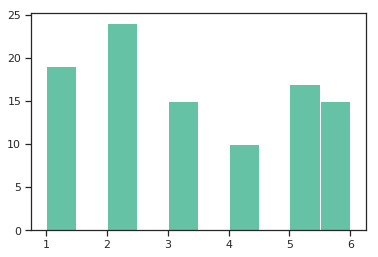

In [12]:
plt.hist(dice_rolls)

Frequentist approach only takes into account the data points in our sample. Bayesian approach also incorporates our prior knowlesge about the population.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)